---
# Stock Exploratory Data Analysis
---
Notebook: 0.1.1-iw-single-stock-eda.ipynb<br>
Dependencies: requirements.txt<br>
Date: 2019-OCT-3<br>
Abstract:
```
    The goal of this notebook is to visualize trends from (8) key stock valuation indicators for a single stock.
    
    1. The Rule of 72 - how long will it take for an investment to double based on compounding interest
    2. P/E Ratio
    3. P/B Ratio
    4. P/S Ratio
    5. Divident Yield %
    6. Payout Ratio %
    7. P/C
    8. Earnings Growth
    9. Debt to Equity Ratio
```

---
## 0. Setup
---

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
tickers = ['NVDA']

In [143]:
df_stock_profile = pd.read_csv('../data/raw/' + '.'.join(tickers) + '.profile.csv')
df_stock = pd.read_csv('../data/raw/' + '.'.join(tickers) + '.csv')

---
## 1. Visualize
---

In [144]:
df_stock_profile

,Unnamed: 0,index,price,beta,volAvg,mktCap,lastDiv,range,changes,changesPercentage,companyName,exchange,industry,website,description,ceo,sector,image
0,0,NVDA,206.77,1.887663,16402332,1.257131e+11,0.64,124.46-292.76,-0.57,(-0.27%),NVIDIA Corporation,Nasdaq Global Select,Semiconductors,http://www.nvidia.com,NVIDIA Corp is a developer of semiconductor eq...,Jen-Hsun Huang,Technology,https://financialmodelingprep.com/images-New-j...


In [145]:
df_stock.head()

,Unnamed: 0,index,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,receivablesTurnover_x,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,...,Graham Number,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Capex per Share
0,0,2009-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.1697,1.276584e+09,2.792887e+09,1.116905e+09,1.402841e+09,515688000.0,357435000.0,355747500.0,-0.0323
1,1,2009-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.1853,1.468910e+09,2.965913e+09,1.317777e+09,1.487377e+09,502827000.0,354391000.0,400815500.0,-0.0301
2,2,2010-01-31,3.4698,2.9872,2.7641,0.0,9.5946,22.1997,18.849,0.0,...,0.0000,0.1697,1.696452e+09,3.095616e+09,1.560052e+09,1.888467e+09,346699000.0,281695500.0,434254000.0,-0.0405
3,3,2010-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.4572,0.2027,1.961687e+09,3.317763e+09,1.784595e+09,2.129306e+09,417028000.0,294427000.0,357699000.0,-0.0301
4,4,2010-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.8289,0.3208,1.836823e+09,3.242545e+09,1.685208e+09,2.070137e+09,373947000.0,278009500.0,356721500.0,-0.0657


In [146]:
[col for col in df_stock.columns if col.startswith('date')]

['date_x', 'date_y', 'date_x.1', 'date_y.1', 'date']

In [147]:
df_stock.dtypes

Unnamed: 0                               int64
index                                   object
priceBookValueRatio                    float64
priceToBookRatio                       float64
priceToSalesRatio                      float64
priceEarningsRatio                     float64
receivablesTurnover_x                  float64
priceToFreeCashFlowsRatio              float64
priceToOperatingCashFlowsRatio         float64
priceCashFlowRatio                     float64
priceEarningsToGrowthRatio             float64
priceSalesRatio                        float64
dividendYield                          float64
enterpriseValueMultiple                float64
priceFairValue                         float64
debtRatio                              float64
debtEquityRatio                        float64
longtermDebtToCapitalization           float64
totalDebtToCapitalization              float64
interestCoverage                       float64
cashFlowToDebtRatio                    float64
companyEquity

In [148]:
indicator_cols = ['priceEarningsRatio', 'priceToBookRatio', 'priceToSalesRatio', 'dividendYield', 'payoutRatio', 'priceCashFlowRatio', 'debtEquityRatio']

In [149]:
df_stock.head()

,Unnamed: 0,index,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,receivablesTurnover_x,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,...,Graham Number,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Capex per Share
0,0,2009-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.1697,1.276584e+09,2.792887e+09,1.116905e+09,1.402841e+09,515688000.0,357435000.0,355747500.0,-0.0323
1,1,2009-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.1853,1.468910e+09,2.965913e+09,1.317777e+09,1.487377e+09,502827000.0,354391000.0,400815500.0,-0.0301
2,2,2010-01-31,3.4698,2.9872,2.7641,0.0,9.5946,22.1997,18.849,0.0,...,0.0000,0.1697,1.696452e+09,3.095616e+09,1.560052e+09,1.888467e+09,346699000.0,281695500.0,434254000.0,-0.0405
3,3,2010-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.4572,0.2027,1.961687e+09,3.317763e+09,1.784595e+09,2.129306e+09,417028000.0,294427000.0,357699000.0,-0.0301
4,4,2010-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.8289,0.3208,1.836823e+09,3.242545e+09,1.685208e+09,2.070137e+09,373947000.0,278009500.0,356721500.0,-0.0657


In [150]:
import plotly.express as px

In [151]:
import plotly.graph_objects as go

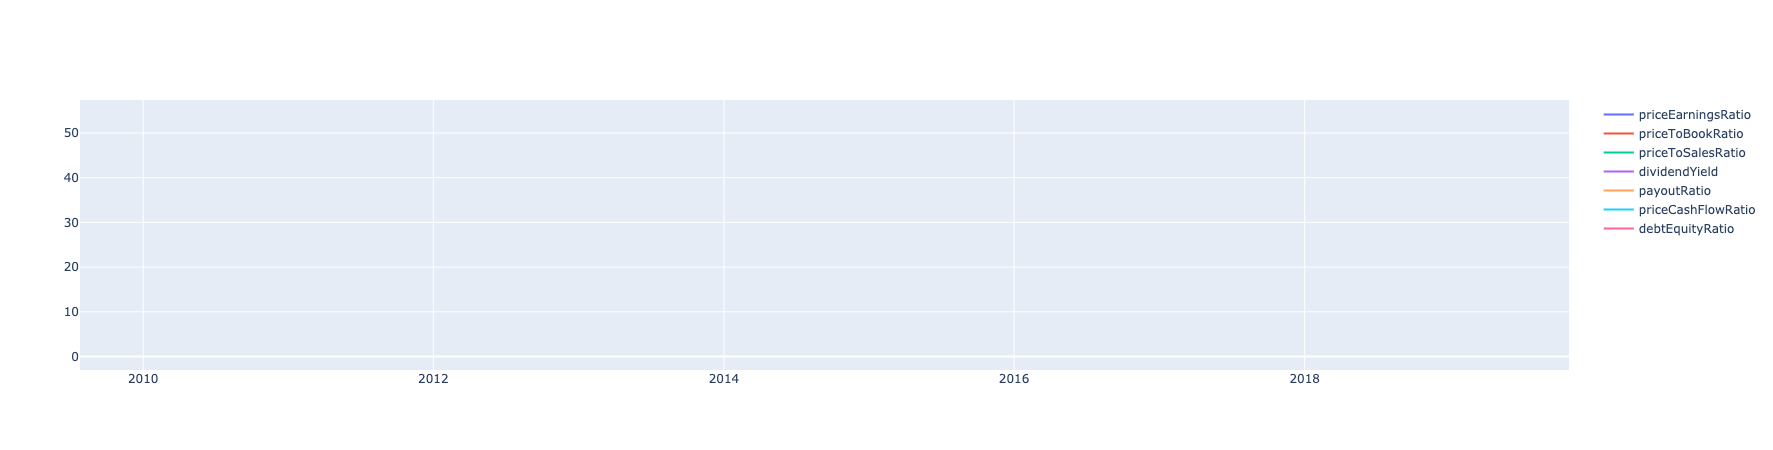

In [152]:
fig = go.Figure()
for indicator in indicator_cols:
    fig.add_trace(go.Scatter(
        x=df_stock['index'],
        y=df_stock[indicator],
        name=indicator))
fig.show()

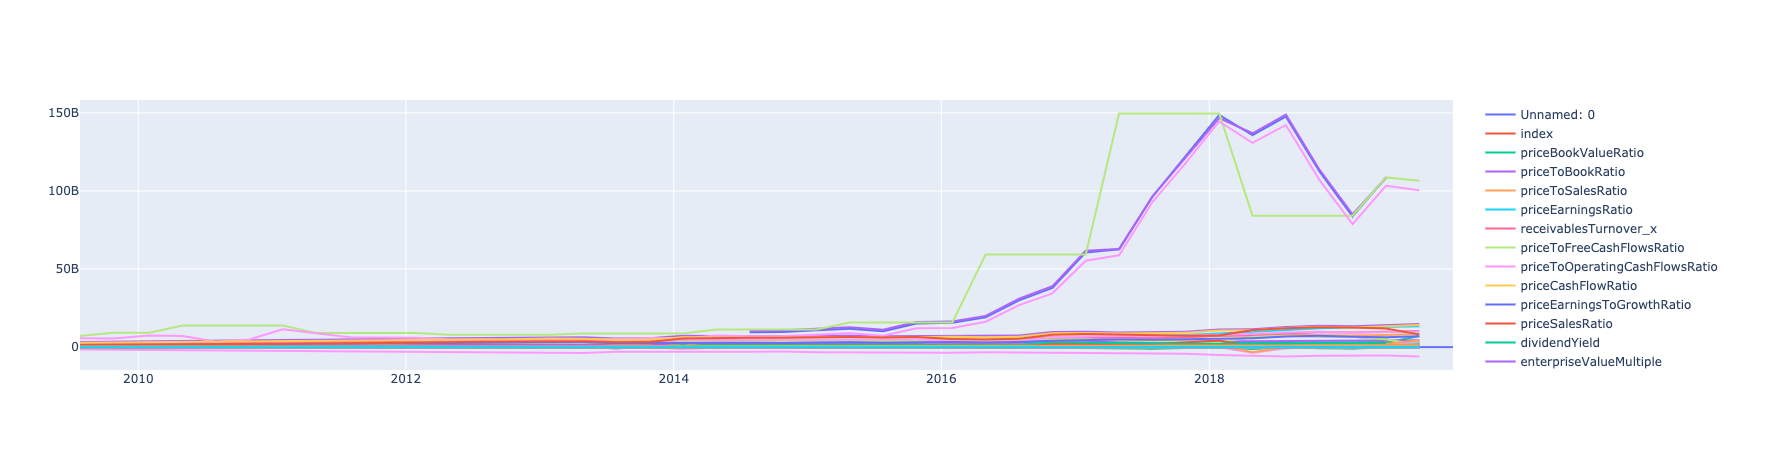

In [153]:
fig = go.Figure()
for indicator in df_stock.columns:
    fig.add_trace(go.Scatter(
        x=df_stock['index'],
        y=df_stock[indicator],
        name=indicator))
fig.show()

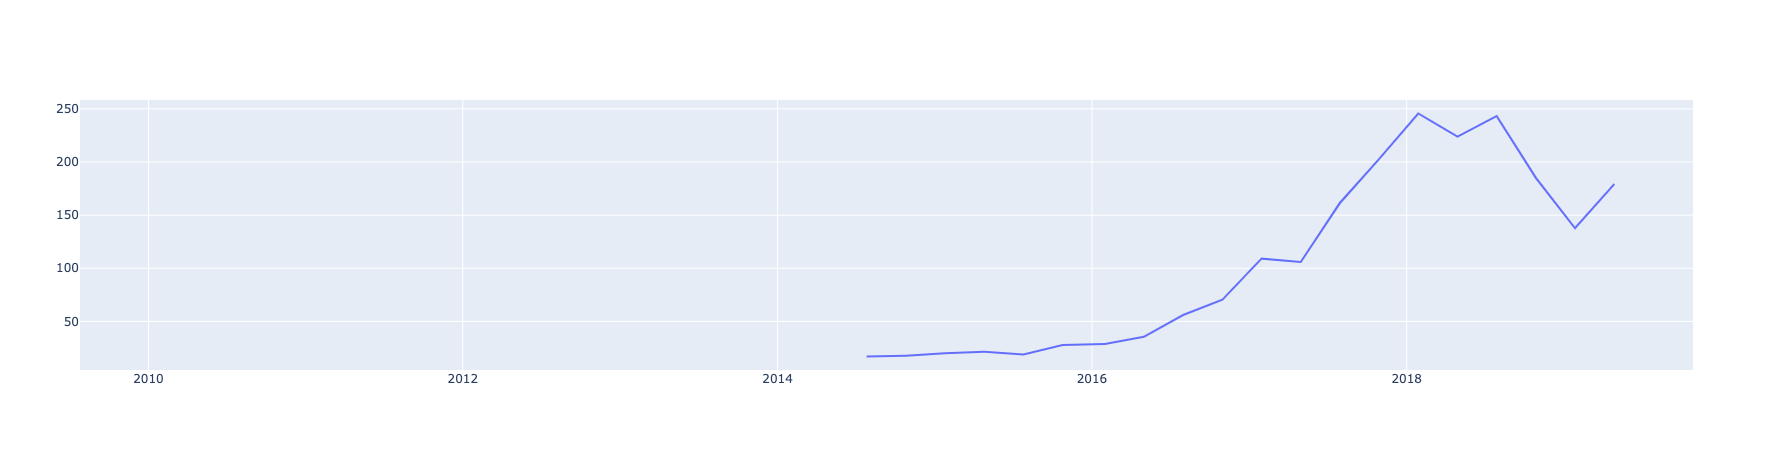

In [156]:
fig = go.Figure()
fig.add_trace(go.Scatter(
        x=df_stock['index'],
        y=df_stock['Stock Price_x'],
        name=indicator))
fig.show()